a.Data Loading

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset
df = pd.read_csv("student_mat.csv")

#display the first few rows
print(df.head())     #default shows first 5 rows

#load the data into dataframe
data = pd.read_csv("student_mat.csv",sep=";")
print("Data loaded successfully!")

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Data loaded successfully!


b.Data Exploration

In [ ]:
#check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

#display column datatypes
print(df.dtypes)

#display dataset size(rows, columns)
print(df.shape)


Missing Values:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
i

c.Data Cleaning

In [ ]:
#Handling missing values(example: filling with median for numeric columns only)
numeric_cols = df.select_dtypes(include=np.number).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median()) # Fill NaNs in numeric columns with median

#Removing duplicate rows
df.drop_duplicates(inplace=True)

#Display dataset size after cleaning
print("Dataset shape after cleaning:", df.shape)

Dataset shape after cleaning: (395, 33)


d. Data Analysis Questions

In [ ]:
# 1.What is the average score in math (G3)?
average_score = df['G3'].mean()
print(f"\nAverage score in math (G3): {average_score:.2f}")


Average score in math (G3): 10.42


In [ ]:
# 2.How many students scored above 15 in their final grade (G3)?
above_15_count = df[df["G3"] > 15].shape[0]
print(f"Students scoring above 15: {above_15_count}")


Students scoring above 15: 40


In [ ]:
# 3.Is there a correlation between study time (study time) and the final grade (G3)?
correlation = df["studytime"].corr(df["G3"])
print(f"Correlation between studytime and final grade: {correlation:.2f}")

Correlation between studytime and final grade: 0.10


In [ ]:
# 4.Which gender has a higher average final grade (G3)?
gender_avg_grade = df.groupby("sex")["G3"].mean()
higher_avg_gender = gender_avg_grade.idxmax()
print(f"Gender with the higher average final grade: {higher_avg_gender}")

Gender with the higher average final grade: M


e.Data Visualization

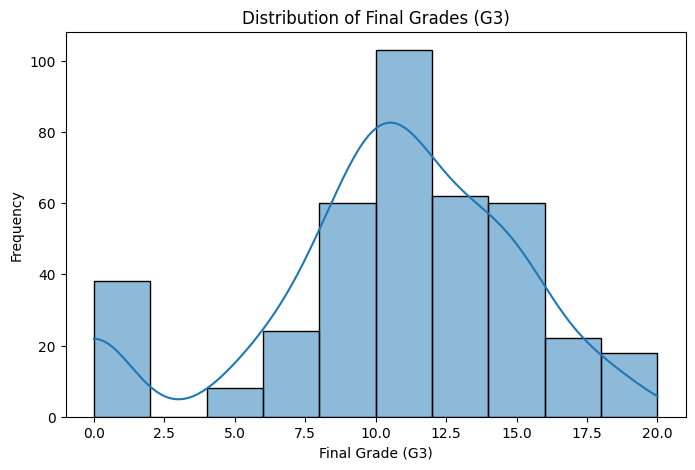

In [ ]:
#Histogram of final grades(G3)
plt.figure(figsize=(8, 5))
sns.histplot(df["G3"], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.show()

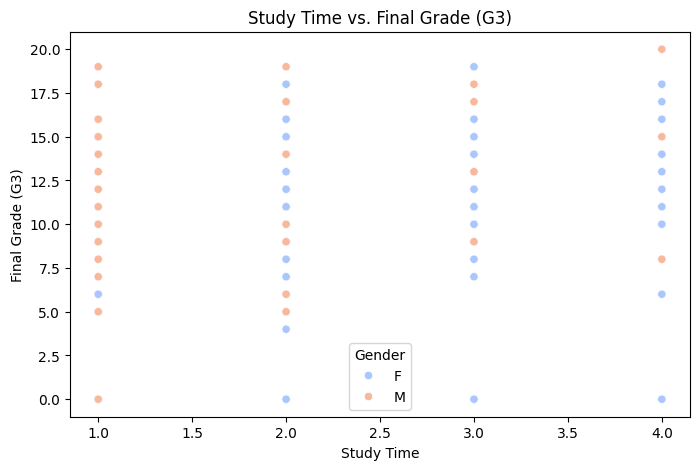

In [ ]:
#A scatter plot between study time (study time) and final grade (G3).
plt.figure(figsize=(8, 5))
sns.scatterplot(x="studytime", y="G3", hue="sex", data=df, palette="coolwarm")
plt.title("Study Time vs. Final Grade (G3)")
plt.xlabel("Study Time")
plt.ylabel("Final Grade (G3)")
plt.legend(title="Gender")
plt.show()


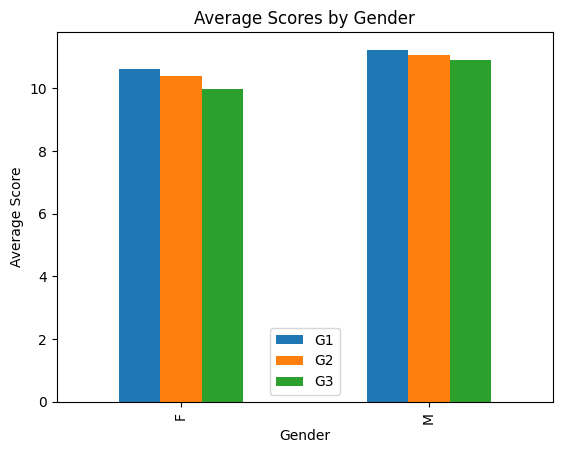

In [ ]:
#A bar chart comparing the average scores of male and female students
average_scores_by_gender = df.groupby("sex")[["G1", "G2", "G3"]].mean()
average_scores_by_gender.plot(kind="bar")
plt.title("Average Scores by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()